In [1]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 15.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load preprocessed data
df = pd.read_csv('data/processed/cleaned_train.csv')

X = df.drop(columns=['Response'])
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [5]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=7.2,  # Replace with your actual value if different
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100
)

xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [6]:
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

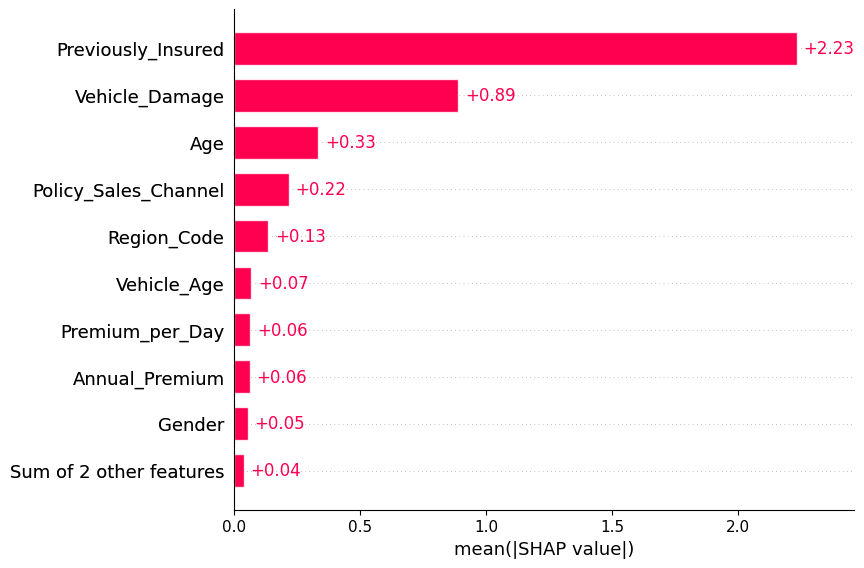

In [7]:
shap.plots.bar(shap_values, max_display=10)

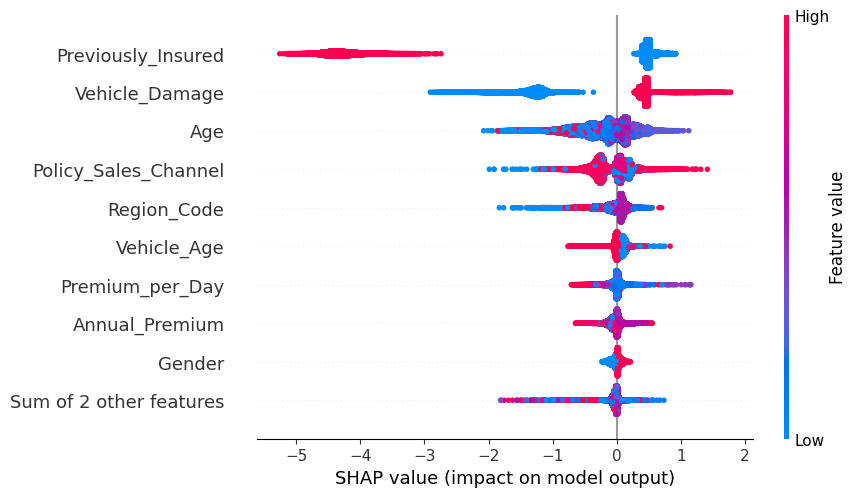

In [8]:
shap.plots.beeswarm(shap_values, max_display=10)

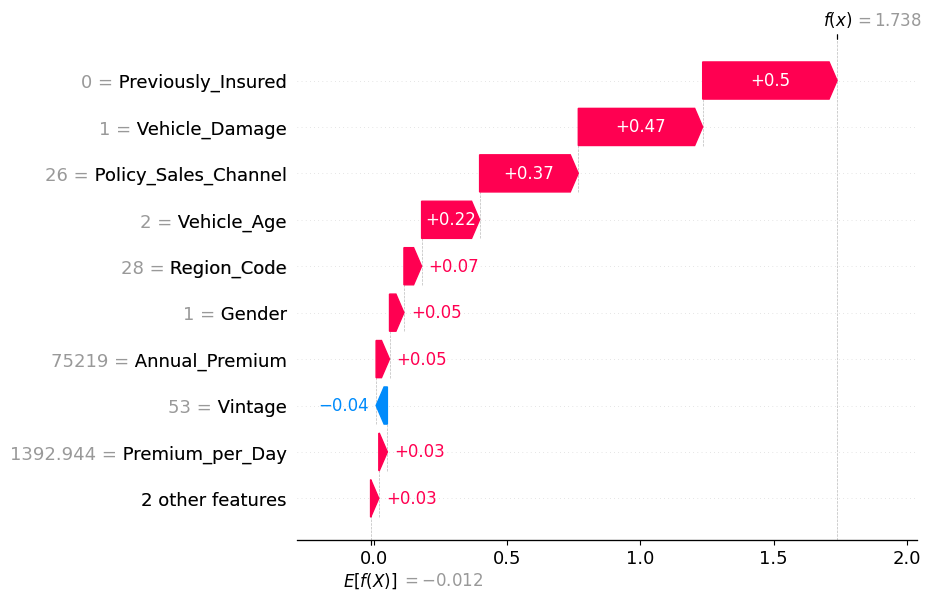

In [9]:
shap.plots.waterfall(shap_values[0])

## – Model Explainability (SHAP)

### Objective:
Understand why XGBoost makes certain predictions using SHAP values.

---

### What was done:
- Installed and imported `shap` package
- Used `shap.Explainer` to compute SHAP values for test data
- Plotted:
  -  **Bar plot**: global feature importance
  -  **Beeswarm plot**: distribution of SHAP values across all samples
  -  **Waterfall plot**: explained a single prediction step-by-step

---

### Key Insights:
- SHAP clearly showed which features most influence conversion predictions
- Helps in explaining the model to business teams or for documentation
- Combined with AUC and recall, adds transparency to model behavior
